# Springboard Capstone Two - Exploratory Data Analysis by Anush Sridharan
## Title : Stroke Prediction                                                                                    


In this notebook we will be performing exploratory data analysis of the stroke dataset to understand the different relationships between the features and to prepare the data for future modelling. 

**Data sources**: This data  is  sourced from the Stroke Prediction Dataset from Kaggle.  This dataset contains 12  patient attributes and  just over 5000 observations that can be used  to develop a model for assessment of stroke probability. Link to dataset (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

In [1]:
# Importing libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the cleaned stroke dataset from the local folder
df = pd.read_csv('stroke_cleaned.csv')

In [3]:
# Looking at the first few rows of the dataset
df.head()

,Unnamed: 0,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
1,1,61.0,0,0,202.21,NaN,1,0,1,0,0,1,0,0,0,1,0
2,2,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0


In [4]:
# Looking at the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      5109 non-null   int64  
 1   age                             5109 non-null   float64
 2   hypertension                    5109 non-null   int64  
 3   heart_disease                   5109 non-null   int64  
 4   avg_glucose_level               5109 non-null   float64
 5   bmi                             4908 non-null   float64
 6   stroke                          5109 non-null   int64  
 7   gender_Male                     5109 non-null   int64  
 8   ever_married_Yes                5109 non-null   int64  
 9   work_type_Never_worked          5109 non-null   int64  
 10  work_type_Private               5109 non-null   int64  
 11  work_type_Self-employed         5109 non-null   int64  
 12  work_type_children              51

**Age, avg_glucose_level and bmi are the only continuous variables, all others are categorical and encoded**

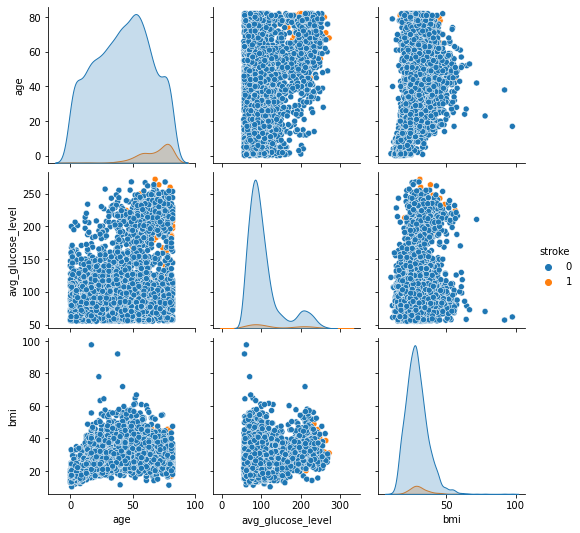

In [38]:
# Using the seaborn pairplot to look at the relationship between the continuous features with each other while
# grouping based on stroke outcomes 
sns.pairplot(df, kind='scatter', vars = ['age', 'avg_glucose_level', 'bmi'], hue='stroke');

The scatter plots are over crowded and it is hard to get a sense of the relationship between the features based on the strok outcomes. To try and improve this visualization we will perform a randomized sampling of the data and change the marker alpha and size to see if this improves the plot. 

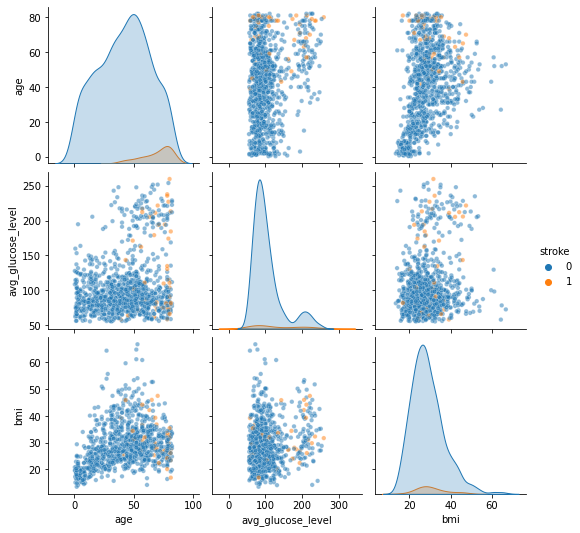

In [46]:
# Pairplot with a random sampling of 1000 observations from the data and reduced alpha and size. 
sns.pairplot(df.sample(1000), kind='scatter', vars = ['age', 'avg_glucose_level', 'bmi'], hue='stroke', 
             plot_kws=dict(alpha=0.5, s=20));

This is certainly improving the plot to the point where we are able to see the different groupings of the outcomes and much better visualization of the relationship between the features. We can try to improve this a bit further by using the 'kdeplot' option to visualize the density of the stroke outcomes for each of the features. 

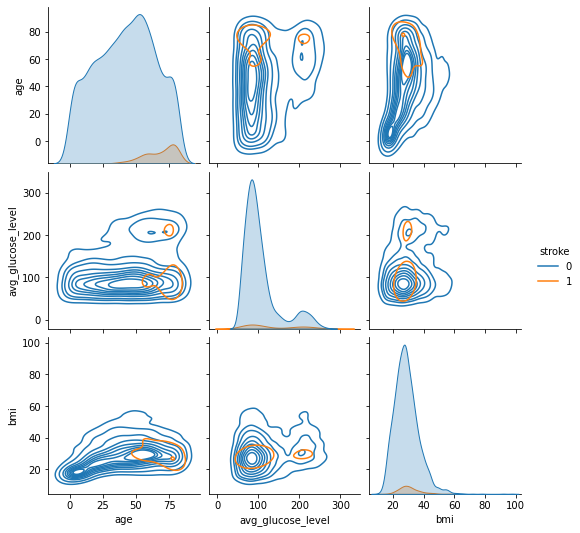

In [42]:
sns.pairplot(df, kind='kde', vars = ['age', 'avg_glucose_level', 'bmi'], hue='stroke');


The pair plots reveals some interesting findings, some of which are expected. For example there seems to be a positive correlation between the age and bmi. There also seems to possibly be a positive correlation between the glucose level and bmi. All other relationships between these features are unclear. 

When looking at the diagonal on the pair plot, we see that for age, the persons without stroke spanned a wide age range from 0 - 90 approximately, while those who did have a stroke where primarily in the older age approximately 50 years or older. For avg_glucose level, those person without stroke primarily were in the lower levels, while those who had a stroke had both lower and higher levels of glucose. And for BMI there seemed to be a similar distribution of between the groups that had stroke and those that did not. 

Looking at the kdeplots for the features, we can see that the most common theme between all plots was that the people that did have stroke were primarily older. 

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df[df.stroke == 1].age, bins =20, alpha=0.75, facecolor = 'g', label="Stroke");
plt.hist(df[df.stroke == 0].age, bins =20, alpha=0.3, label="No stroke");
plt.legend(loc='upper right');
plt.xlabel('Age');
plt.ylabel('Count');
plt.title('Distribution of age w.r.t stroke outcome');

As expected the age distrubtion of people who have stroke are skewed towards older ages. 

In [ ]:
plt.figure(figsize = (8,6))
plt.hist(df[df.stroke == 1].avg_glucose_level, bins =20, alpha=0.75, facecolor = 'g', label="Stroke");
plt.hist(df[df.stroke == 0].avg_glucose_level, bins =20, alpha=0.2, label="No stroke");
plt.legend(loc='upper right');
plt.ylabel('Count');
plt.title('Distribution of glucose level w.r.t stroke outcome');

There seems to be a skew towards lower glucose levels in people who don't experience stroke. 

In [ ]:
plt.figure(figsize = (8,6))
plt.hist(df[df.stroke == 1].bmi, bins =50, alpha=0.75, facecolor = 'g', label="Stroke");
plt.hist(df[df.stroke == 0].bmi, bins =50, alpha=0.2, label="No stroke");
plt.legend(loc='upper right');
plt.ylabel('Count');
plt.title('Distribution of BMI w.r.t stroke outcome');

No obvious difference in the BMI distributions between the two groups. Need to look into this further. 